<span style="color: #ffd33d">모델 작성</span>
-----------

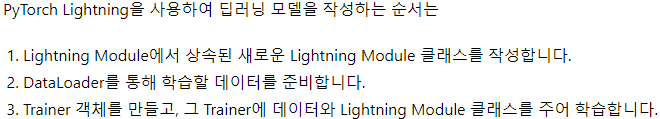

In [ ]:
# 예시 코드

import pytorch_lightning as pl

class LitModel(pl.LightningModule): # LightningModule을 상속받는 새로운 클래스 작성 (pytorch에서 nn.Module을 상속받는 것과 비슷)
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(28 * 28, 10)

    def forward(self, x):
        return torch.relu(self.l1(x.view(x.size(0), -1)))

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = F.cross_entropy(y_hat, y)
        return loss

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=0.02)

train_loader = DataLoader(MNIST(os.getcwd(), download=True, transform=transforms.ToTensor())) # 데이터 준비

trainer = pl.Trainer() # Trainer 객체 생성
model = LitModel()
trainer.fit(model, train_loader) # 학습 시작

<span style="color: #ffd33d">LightningModule Class</span>
-----------

- 기존 PyTorch는 DataLoader, Mode, optimizer, Training loof 등을 전부 따로따로 코드로 구현
- Pytorch Lightning에서는 Lightning Model class 안에 이 모든것을 한번에 구현
    - ligthning module을 정의하기 위해 LightningModule 클래스를 상속받고 모델, training, validation, test 루프 그리고 optimizer 등을 구현

In [ ]:
import pytorch_lightning as pl

class Classifier(pl.LightningModule) :
    def __init__(self) : # Lightning Module class에서 사용할 신경망 정의
        super().__init__()
        self.model = nn.Sequential(
            ...
        )
    
    def forward(self, x) : # 모델의 inference를 위한 forward 정의
        return self.model(x)
    
    def training_step(self, batch, batch_idx): # nn.Module의 forward와 유사하지만, 단일 배치에서의 loss을 반환
        x, y = batch                           # trainer의 설정에 따라 batch의 tensor를 자동으로 cpu 혹은 gpu 텐서로 변환
        y_hat = self.model(x)
        loss = F.cross_entropy(y_hat, y)
        self.log('train_loss', loss, on_step=True, on_epoch=True, prog_bar=True, logger=True) # logging을 위한 log 메서드. 
        return loss                                                                           
    
    def training_epoch_end(self, training_step_outputs) : # training_step의 결과를 받아 epoch 단위의 loss를 반환
        for pred in training_step_outputs :
            ...

    def validation_step(self, batch, batch_idx): # 학습 중간에 모델의 성능을 체크
        pass
    
    def validation_epoch_end(self, validation_step_outputs) : # validation_step의 결과를 받아 epoch 단위의 loss를 반환
        pass

    def test_step(self, batch, batch_idx): # 호출할 때는 trainer.test()로 호출. 
        pass

    def configure_optimizers(self): # optimizer와 learning rate scheduler를 구현. 반환
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-4)
    